## Лабораторна робота 5. **CLASSIFICATION** 🔵/🔺

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

# Опис вибірки "bank-additional-full"

   # Input variables:
   `bank client data:`  
   1 - **age** (numeric)  
   2 - **job** : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")  
   3 - **marital** : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)  
   4 - **education** (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")  
   5 - **default**: has credit in default? (categorical: "no","yes","unknown")  
   6 - **housing**: has housing loan? (categorical: "no","yes","unknown")  
   7 - **loan**: has personal loan? (categorical: "no","yes","unknown")  
   # related with the last contact of the current campaign:  
   8 - **contact**: contact communication type (categorical: "cellular","telephone")   
   9 - **month**: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  10 - **day_of_week**: last contact day of the week (categorical: "mon","tue","wed","thu","fri")  
  11 - **duration**: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  
   # other attributes:  
  12 - **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  13 - **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
  14 - **previous**: number of contacts performed before this campaign and for this client (numeric) 
  15 - **poutcome**: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")  
   # social and economic context attributes  
  16 - **emp.var.rate**: employment variation rate - quarterly indicator (numeric)  
  17 - **cons.price.idx**: consumer price index - monthly indicator (numeric)       
  18 - **cons.conf.idx**: consumer confidence index - monthly indicator (numeric)       
  19 - **euribor3m**: euribor 3 month rate - daily indicator (numeric)  
  20 - **nr.employed**: number of employees - quarterly indicator (numeric)  
    
   `Output variable (desired target):`  
  21 - **y** - has the client subscribed a term deposit? (binary: "yes","no")

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `bank-additional-full.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. вивести розмірність датасету.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'seaborn'

In [13]:
df = pd.read_csv("bank-additional-full.csv", sep=";")
print("Basic statistics for numerical variables:")
print(df.describe())
print("\nDataset dimensions:", df.shape)

Basic statistics for numerical variables:
               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1

**Завдання 2** підготовка цільової змінної  

1. проаналізувати атрибути вибірки, визначити цільовий атрибут `target atribute`;
2. якщо `target atribute` є категоріальним, його необхідно перетворити в чисельний.

In [33]:
df = pd.read_csv("bank-additional-full.csv", sep=";")  
print(df.columns)  

if "y" in df.columns:
    df["y"] = df["y"].map({"yes": 1, "no": 0})
    print(df["y"].value_counts())



Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')
y
0    36548
1     4640
Name: count, dtype: int64


## Аналіз змінних, які характеризують клієнтів банку:

**Завдання 3** Визначитись зі всіма атрибутами, що характреризують кліентів банку:
- виділити їх в окрему частину;
- первірити всі змінні (які унікальні значення містять атрибути)(дивись опис датасету).

In [32]:
client_attributes = df.drop(columns=["y"])  
for col in client_attributes.columns:
    print(f"{col}: {df[col].unique()[:10]}")  


age: [56 57 37 40 45 59 41 24 25 29]
job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown']
marital: ['married' 'single' 'divorced' 'unknown']
education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default: ['no' 'unknown' 'yes']
housing: ['no' 'yes' 'unknown']
loan: ['no' 'yes' 'unknown']
contact: ['telephone' 'cellular']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week: ['mon' 'tue' 'wed' 'thu' 'fri']
duration: [261 149 226 151 307 198 139 217 380  50]
campaign: [ 1  2  3  4  5  6  7  8  9 10]
pdays: [999   6   4   3   5   1   0  10   7   8]
previous: [0 1 2 3 4 5 6 7]
poutcome: ['nonexistent' 'failure' 'success']
emp.var.rate: [ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]
cons.price.idx: [93.994 94.465 93.918 93.444 93.798 93.2   92.756 92.843 93.075 92.893]
cons.conf.idx: [-36.4 -41.8 -42.7 -36.1 -40.4

**Завдання 4** Аналіз атрибуту `Age`:  
1. Вивести максимальне та мінімальне значення;  
2. Перевірити на наявність `NaN`;  
3. Провести візуальний аналіз зміної `Age`:
    - побудувати `countplot`, `boxplot`, `distplot`;
    - перевірити розподіл по змінній `Age` на важкі хвости.

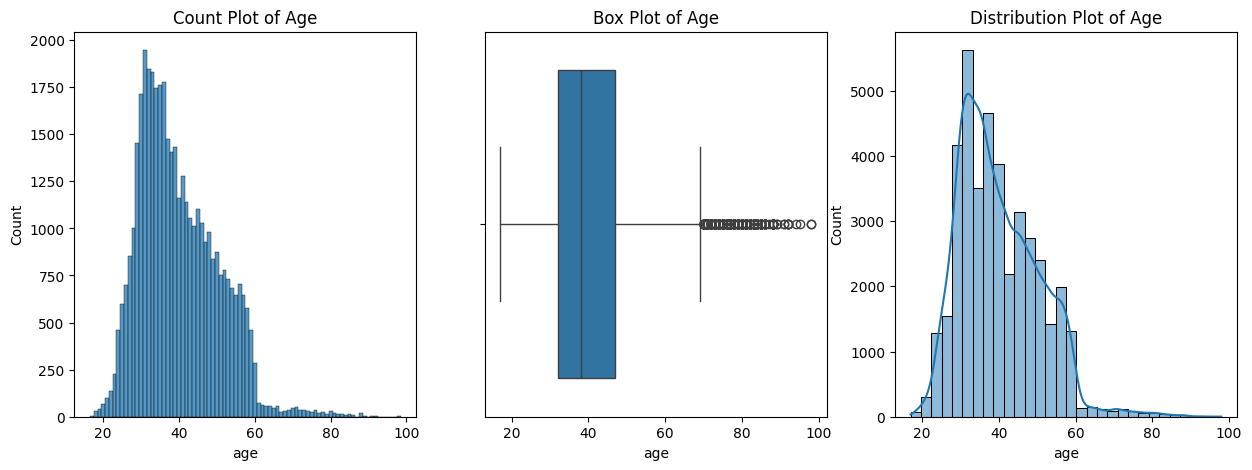

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df["age"], bins=30, kde=False, discrete=True)
plt.xticks(rotation=0)  
plt.title("Count Plot of Age")

plt.subplot(1, 3, 2)
sns.boxplot(x=df["age"])
plt.title("Box Plot of Age")

plt.subplot(1, 3, 3)
sns.histplot(df["age"], bins=30, kde=True)
plt.title("Distribution Plot of Age")

plt.show()


**Висновки з 1-4 завдання (детальні)**

графік 1 Відображає кількість клієнтів для кожного віку.

графік 2 точки це викиди, більшість клієнти 30-50 років, медіана 40 років

графік 3 важкі хвости це клієнти 80+ років

**Завдання 5** Перевірити атрибут `Age` на викиди: 

In [47]:
import numpy as np
import pandas as pd

def detect_outliers_iqr(df: pd.DataFrame, column: str) -> pd.DataFrame:
    """
    Detecting outliers using the interquartile range (IQR) method (25th and 75th percentiles).

    df: DataFrame to analyze.
    column: Column to check for outliers.

    Returns: DataFrame with detected outliers.
    """

    if column not in df.columns:
        raise ValueError(f"Column '{column}' not found in DataFrame.")

    sorted_data = np.sort(df[column])

    Q1 = np.percentile(sorted_data, 25)
    Q3 = np.percentile(sorted_data, 75)
    IQR = Q3 - Q1

    print(f"Q1 (25th percentile): {Q1}")
    print(f"Q3 (75th percentile): {Q3}")
    print(f"Interquartile range (IQR): {IQR}")

    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR

    print(f"Lower bound: {low_lim}")
    print(f"Upper bound: {up_lim}")

    outliers = df[(df[column] > up_lim) | (df[column] < low_lim)]

    print("\nOutliers in the dataset:")
    display(outliers)

    return outliers

csv_file_path = "bank-additional-full.csv"
df = pd.read_csv(csv_file_path, sep=";")

outliers_iqr = detect_outliers_iqr(df, 'age')


Q1 (25th percentile): 32.0
Q3 (75th percentile): 47.0
Interquartile range (IQR): 15.0
Lower bound: 9.5
Upper bound: 69.5

Outliers in the dataset:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
27713,70,retired,divorced,basic.4y,no,yes,no,cellular,mar,mon,...,3,999,0,nonexistent,-1.8,92.843,-50.0,1.811,5099.1,yes
27757,76,retired,married,university.degree,no,no,yes,cellular,mar,thu,...,9,999,0,nonexistent,-1.8,92.843,-50.0,1.757,5099.1,no
27780,73,retired,married,university.degree,no,yes,no,cellular,mar,tue,...,1,999,1,failure,-1.8,92.843,-50.0,1.687,5099.1,no
27800,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,...,1,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,no
27802,88,retired,divorced,basic.4y,no,no,no,cellular,mar,wed,...,2,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40986,84,retired,divorced,basic.4y,unknown,yes,yes,cellular,oct,mon,...,4,3,1,success,-1.1,94.601,-49.5,1.000,4963.6,no
40996,81,retired,married,basic.4y,no,yes,no,cellular,oct,wed,...,1,999,2,failure,-1.1,94.601,-49.5,1.016,4963.6,yes
41004,80,retired,married,professional.course,no,yes,no,cellular,oct,thu,...,1,999,1,failure,-1.1,94.601,-49.5,1.025,4963.6,yes
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


**Висновки з завдання 5 (детальні)**

всього є 469 викиди, ті хто старше 70 років

**Завдання 6** Аналіз атрибутів `job`, `marital` та `education`:  
- Побудувати графіки розподілу даних по цим змінним.

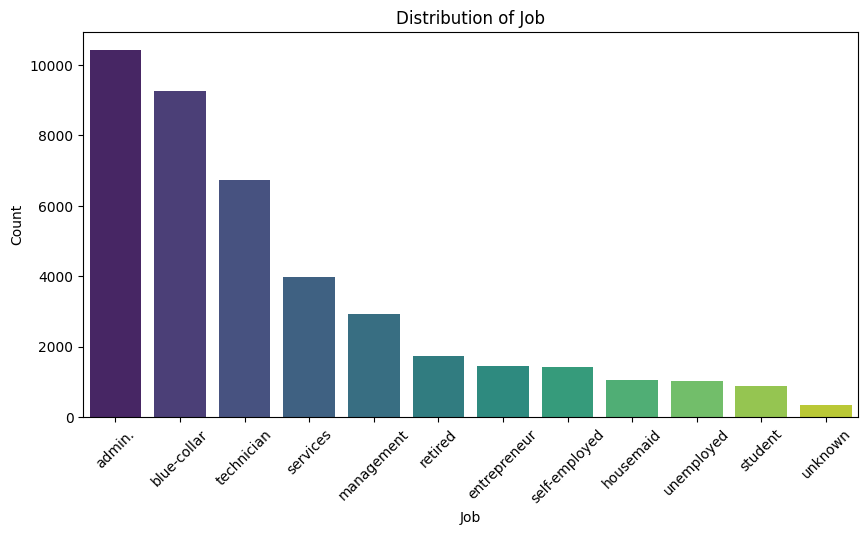

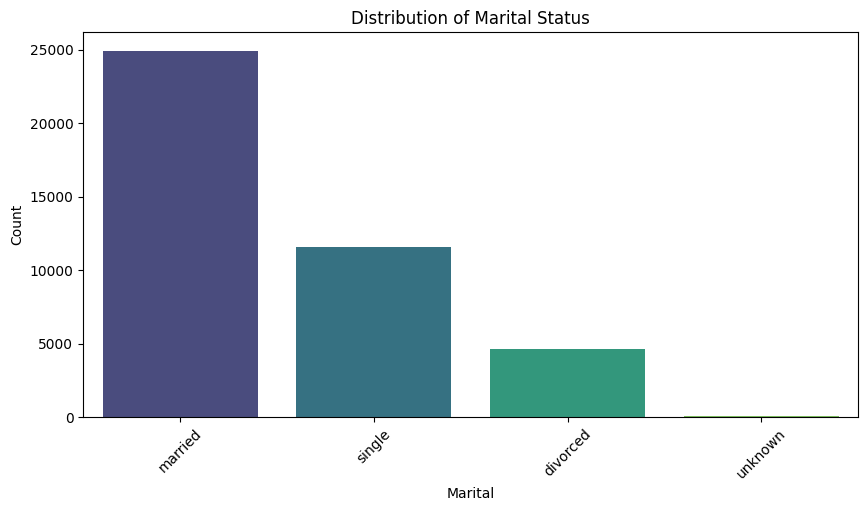

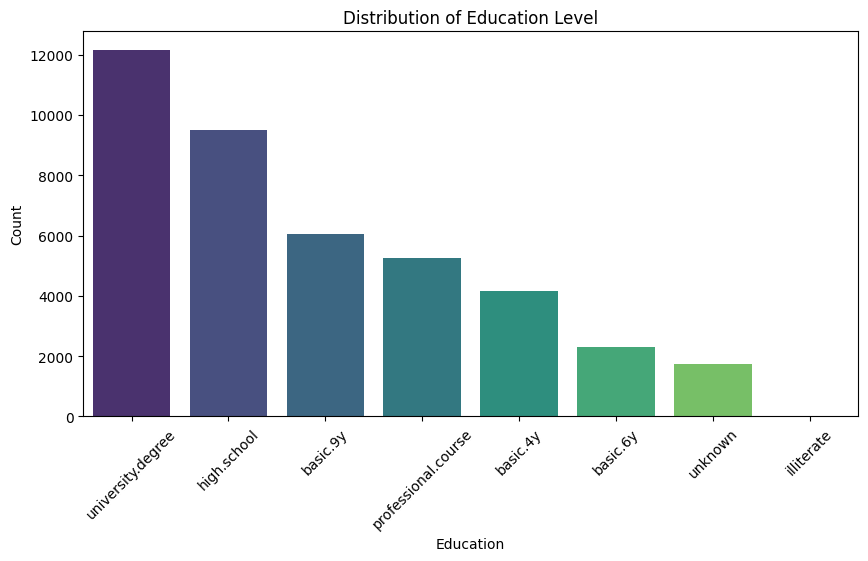

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_categorical_distribution(df, column, title):
    plt.figure(figsize=(10, 5))
    sns.countplot(x=df[column], order=df[column].value_counts().index, palette="viridis")
    plt.xticks(rotation=45)
    plt.xlabel(column.capitalize())
    plt.ylabel("Count")
    plt.title(f"Distribution of {title}")
    plt.show()

plot_categorical_distribution(df, "job", "Job")
plot_categorical_distribution(df, "marital", "Marital Status")
plot_categorical_distribution(df, "education", "Education Level")


**Завдання 7** Аналіз атрибутів `default`, `housing` та `loan`:  
- Побудувати графіки розподілу даних по цим змінним.

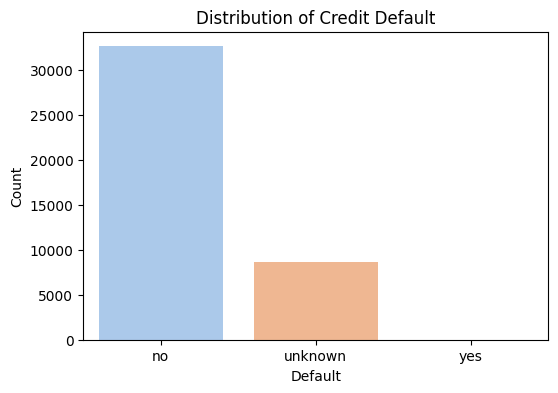

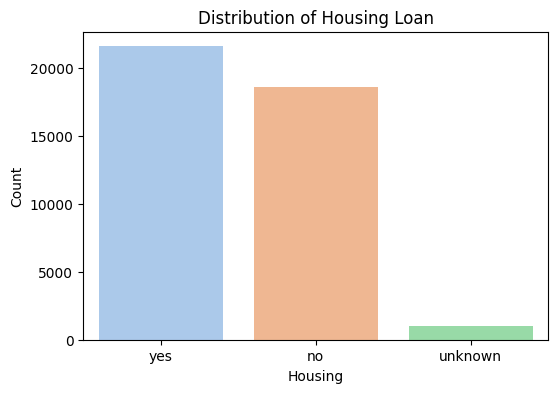

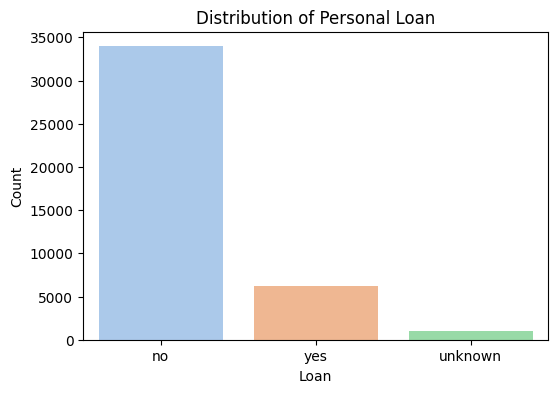

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv_file_path = "bank-additional-full.csv"
df = pd.read_csv(csv_file_path, sep=";")

def plot_categorical_distribution(df, column, title):
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[column], order=df[column].value_counts().index, palette="pastel")
    plt.xlabel(column.capitalize())
    plt.ylabel("Count")
    plt.title(f"Distribution of {title}")
    plt.show()

plot_categorical_distribution(df, "default", "Credit Default")
plot_categorical_distribution(df, "housing", "Housing Loan")
plot_categorical_distribution(df, "loan", "Personal Loan")


**Завдання 8** Змінні **Jobs, Marital, Education, Default, Housing, Loan** трансформувати в неперервні змінні:

In [53]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

csv_file_path = "bank-additional-full.csv"
df = pd.read_csv(csv_file_path, sep=";")

def encode_categorical_columns(df: pd.DataFrame, categorical_cols: list) -> pd.DataFrame:
    """
    Function for encoding categorical features using LabelEncoder.

    df: pd.DataFrame to encode
    categorical_cols: specified columns to encode

    returns: pd.DataFrame with encoded values
    """
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))  

    return df

categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan']
df_encoded = encode_categorical_columns(df, categorical_features)
print(df_encoded.head())


   age  job  marital  education  default  housing  loan    contact month  \
0   56    3        1          0        0        0     0  telephone   may   
1   57    7        1          3        1        0     0  telephone   may   
2   37    7        1          3        0        2     0  telephone   may   
3   40    0        1          1        0        0     0  telephone   may   
4   56    7        1          3        0        0     2  telephone   may   

  day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0         mon  ...         1    999         0  nonexistent          1.1   
1         mon  ...         1    999         0  nonexistent          1.1   
2         mon  ...         1    999         0  nonexistent          1.1   
3         mon  ...         1    999         0  nonexistent          1.1   
4         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -3

**Завдання 9** Трансфомувати змінну **Age** (використовуючи її квартильні значення):




In [58]:
import numpy as np
import pandas as pd

csv_file_path = "bank-additional-full.csv"
df = pd.read_csv(csv_file_path, sep=";")

def encode_age(dataframe: pd.DataFrame, age_col: str) -> pd.DataFrame:
    """
    Function for encoding age column based on quartile ranges.

    df: pd.DataFrame to encode
    age_col: age column to encode

    returns: pd.DataFrame with encoded age categories
    """

    if age_col not in dataframe.columns:
        raise ValueError(f"Column '{age_col}' not found in DataFrame.")

    Q1 = dataframe[age_col].quantile(0.25)
    Q2 = dataframe[age_col].median()  
    Q3 = dataframe[age_col].quantile(0.75)

    dataframe[f"{age_col}_category"] = pd.cut(
        dataframe[age_col],
        bins=[dataframe[age_col].min(), Q1, Q2, Q3, dataframe[age_col].max()],
        labels=["Young", "Middle-Aged", "Senior", "Elderly"],
        include_lowest=True
    )

    return dataframe

df_transformed = encode_age(df, 'age')

print(df_transformed[['age', 'age_category']].head())


   age age_category
0   56      Elderly
1   57      Elderly
2   37  Middle-Aged
3   40       Senior
4   56      Elderly



Young 17-32
Middle-Aged 33-38
Senior 39-47
Elderly 48-98

## Вибірка містить певну кількість атрибутів, які характеризують останій зв'язок кліентів з банком

**Завдання 10** Виділити в окремий датафрейм змінні, які характеризують зв'язок клієнтів з банком;
- вивести цей датафрейм;
- перевірити ці змінні на `NaN`.

In [63]:
import pandas as pd

csv_file_path = "bank-additional-full.csv"
df = pd.read_csv(csv_file_path, sep=";")

bank_relation_columns = ['contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome']

bank_relat = df[bank_relation_columns]

missing_values = bank_relat.isna().sum()

print(bank_relat.head())

print("\nMissing values:")
print(missing_values)


     contact month day_of_week  campaign  pdays  previous     poutcome
0  telephone   may         mon         1    999         0  nonexistent
1  telephone   may         mon         1    999         0  nonexistent
2  telephone   may         mon         1    999         0  nonexistent
3  telephone   may         mon         1    999         0  nonexistent
4  telephone   may         mon         1    999         0  nonexistent

Missing values:
contact        0
month          0
day_of_week    0
campaign       0
pdays          0
previous       0
poutcome       0
dtype: int64


**Завдання 11** вивести унікальні значення, які містять атрибути `contact`, `month`, `day_of_week`

In [67]:
import pandas as pd

csv_file_path = "bank-additional-full.csv"
df = pd.read_csv(csv_file_path, sep=";")

unique_values = {
    "contact": df["contact"].unique(),
    "month": df["month"].unique(),
    "day_of_week": df["day_of_week"].unique(),
}

unique_values_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in unique_values.items()]))

print("Unique values:")
print(unique_values_df)


Unique values:
     contact month day_of_week
0  telephone   may         mon
1   cellular   jun         tue
2        NaN   jul         wed
3        NaN   aug         thu
4        NaN   oct         fri
5        NaN   nov         NaN
6        NaN   dec         NaN
7        NaN   mar         NaN
8        NaN   apr         NaN
9        NaN   sep         NaN


# Провести аналіз змінної **Duration**

змінна ` duration` містить інформацію про тривалість останнього дзвінка, в секундах (числова). Важливе зауваження: цей атрибут сильно впливає на цільову змінну (наприклад, якщо тривалість = 0, тоді y = "ні"). Проте тривалість невідома до здійснення дзвінка. Крім того, після закінчення дзвінка y, очевидно, відомо. Таким чином, цей внесок слід включати лише для цілей порівняльних показників і відкидати, якщо метою є реалістична модель прогнозування.

**Завдання 12** Аналіз атрибуту `duration`:  

Провести візуальний аналіз зміної `duration`:  


*   побудувати  `boxplot` та `distplot`; 
*   перевірити розподіл по змінній `duration` на важкі хвости. 



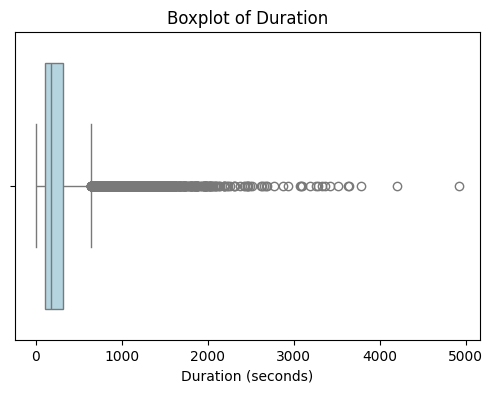

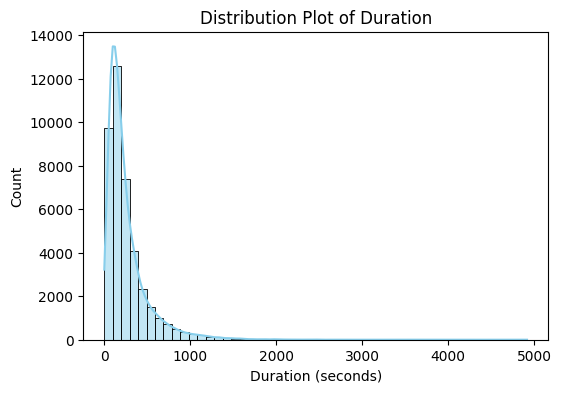

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.boxplot(x=df["duration"], color="lightblue")
plt.title("Boxplot of Duration")
plt.xlabel("Duration (seconds)")
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(df["duration"], bins=50, kde=True, color="skyblue")
plt.title("Distribution Plot of Duration")
plt.xlabel("Duration (seconds)")
plt.ylabel("Count")
plt.show()


**Завдання 13** Закодувати змінні Contact, Month, Day of Week (використовуйте функцію `encode_categorical_columns()`)

In [71]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

csv_file_path = "bank-additional-full.csv"
df = pd.read_csv(csv_file_path, sep=";")
def encode_categorical_columns(df: pd.DataFrame, categorical_cols: list) -> pd.DataFrame:
    """
    Function for encoding categorical features using LabelEncoder.

    df: pd.DataFrame to encode
    categorical_cols: specified columns to encode

    returns: pd.DataFrame with encoded values
    """
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))  

    return df

categorical_features = ['contact', 'month', 'day_of_week']

df_encoded = encode_categorical_columns(df, categorical_features)

print(df_encoded[['contact', 'month', 'day_of_week']].head())


   contact  month  day_of_week
0        1      6            1
1        1      6            1
2        1      6            1
3        1      6            1
4        1      6            1


**Завдання 14** Трансфомувати змінну **duration**, використовуючи її квартильні значення:

In [75]:
import pandas as pd

csv_file_path = "bank-additional-full.csv"
df = pd.read_csv(csv_file_path, sep=";")

def encode_duration(dataframe: pd.DataFrame, duration_col: str) -> pd.DataFrame:
    """
    Function for encoding duration column based on quartile ranges.

    dataframe: pd.DataFrame to encode
    duration_col: duration column to encode

    returns: pd.DataFrame with encoded duration categories
    """

    if duration_col not in dataframe.columns:
        raise ValueError(f"Column '{duration_col}' not found in DataFrame.")

    Q1 = dataframe[duration_col].quantile(0.25)
    Q2 = dataframe[duration_col].median()
    Q3 = dataframe[duration_col].quantile(0.75)

    dataframe[f"{duration_col}_category"] = pd.cut(
        dataframe[duration_col],
        bins=[dataframe[duration_col].min(), Q1, Q2, Q3, dataframe[duration_col].max()],
        labels=["Short", "Medium", "Long", "Very Long"],
        include_lowest=True
    )

    return dataframe

df = encode_duration(df, 'duration')

print(df[['duration', 'duration_category']].head())


   duration duration_category
0       261              Long
1       149            Medium
2       226              Long
3       151            Medium
4       307              Long


In [73]:
bank_relat = encode_duration(bank_relat, 'duration')

## Провести аналіз атрибутів **соціального та економічного контексту**

**Завдання 15** Виділити в окремий датафрейм атрибути соціального та єкономічного контексту

In [76]:
import pandas as pd

csv_file_path = "bank-additional-full.csv"
df = pd.read_csv(csv_file_path, sep=";")

socioeconomic_columns = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

bank_socec = df[socioeconomic_columns]

print(bank_socec.head())


   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed
0           1.1          93.994          -36.4      4.857       5191.0
1           1.1          93.994          -36.4      4.857       5191.0
2           1.1          93.994          -36.4      4.857       5191.0
3           1.1          93.994          -36.4      4.857       5191.0
4           1.1          93.994          -36.4      4.857       5191.0


**Завдання 16** Виділити в окремий датафрейм всі інші атрибути атрибути - `campaign`, `pdays`,`previous`, `poutcome`

In [ ]:
import pandas as pd

csv_file_path = "bank-additional-full.csv"
df = pd.read_csv(csv_file_path, sep=";")

other_columns = ['campaign', 'pdays', 'previous', 'poutcome']

bank_other = df[other_columns]

print(bank_other.head())


   campaign  pdays  previous     poutcome
0         1    999         0  nonexistent
1         1    999         0  nonexistent
2         1    999         0  nonexistent
3         1    999         0  nonexistent
4         1    999         0  nonexistent


**Завдання 17** Провести трансформацію атрибуту `poutcome`

In [79]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

csv_file_path = "bank-additional-full.csv"
df = pd.read_csv(csv_file_path, sep=";")

le = LabelEncoder()
df['poutcome'] = le.fit_transform(df['poutcome'])

print("Unique values:", df['poutcome'].unique())

print(df[['poutcome']].head())


Unique values: [1 0 2]
   poutcome
0         1
1         1
2         1
3         1
4         1


## Будування моделей класифікації

**Завдання 18** З'єднати всі отримані блоки в один датафрейм і перевірити, що він містить тільки потрібні для моделювання колонки

In [81]:
import pandas as pd

bank_final = pd.concat([bank_other, df_transformed, bank_socec], axis=1)

print(bank_final.head())

print("Final lisr:", bank_final.columns)


   campaign  pdays  previous     poutcome  age        job  marital  \
0         1    999         0  nonexistent   56  housemaid  married   
1         1    999         0  nonexistent   57   services  married   
2         1    999         0  nonexistent   37   services  married   
3         1    999         0  nonexistent   40     admin.  married   
4         1    999         0  nonexistent   56   services  married   

     education  default housing  ...  cons.conf.idx euribor3m  nr.employed  \
0     basic.4y       no      no  ...          -36.4     4.857       5191.0   
1  high.school  unknown      no  ...          -36.4     4.857       5191.0   
2  high.school       no     yes  ...          -36.4     4.857       5191.0   
3     basic.6y       no      no  ...          -36.4     4.857       5191.0   
4  high.school       no      no  ...          -36.4     4.857       5191.0   

    y  age_category  emp.var.rate  cons.price.idx  cons.conf.idx euribor3m  \
0  no       Elderly           1.

**Завдання 19** Провести ділення вибірки

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler

csv_file_path = "bank-additional-full.csv"
bank_final = pd.read_csv(csv_file_path)

print(bank_final.head())


  age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"
0  56;"housemaid";"married";"basic.4y";"no";"no";...                                                                                                                                                                          
1  57;"services";"married";"high.school";"unknown...                                                                                                                                                                          
2  37;"services";"married";"high.school";"no";"ye...                                                                                                                                                                          
3  40;"admin.";"married";"basic.6y";"no";"no";"no...                                                        

In [24]:
def prepare_data_for_training(X: pd.DataFrame, target_col: str, test_size: float, n_splits: int, random_state: int):
    y = X[target_col]
    X = X.drop(columns=[target_col])
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)
    
    k_fold = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    return X_train, X_test, y_train, y_test, k_fold


In [25]:
def scale_the_data(X_train: pd.DataFrame, X_test: pd.DataFrame):
    sc_X = StandardScaler()
    
    X_train_scaled = sc_X.fit_transform(X_train)
    X_test_scaled = sc_X.transform(X_test)
    
    return X_train_scaled, X_test_scaled


In [26]:
csv_file_path = "bank-additional-full.csv"
bank_final = pd.read_csv(csv_file_path, sep=";")  
print(bank_final.head())


   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

## Логістична Регресія

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
[[7108  195]
 [ 542  393]]
Accuracy Score: 0.910536537994659


## k-NN

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

csv_file_path = "bank-additional-full.csv"  
bank_final = pd.read_csv(csv_file_path, delimiter=";")

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in bank_final.select_dtypes(include=['object']).columns:
    bank_final[col] = label_encoder.fit_transform(bank_final[col].astype(str))

X = bank_final.drop(columns=['y']) 
y = bank_final['y']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

neighbors = np.arange(1, 26, 2) 
cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', p=2, metric='euclidean')
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean() * 100)
    print(f"{k}-NN accuracy: {scores.mean() * 100:.2f}%")

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print(f"The optimal number of neighbors is {optimal_k} with accuracy of {max(cv_scores):.1f}%")

knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(f"Accuracy: {round(accuracy_score(y_test, knnpred), 2) * 100}%")

KNCV = cross_val_score(knn, X_train, y_train, cv=10, n_jobs=1, scoring='accuracy').mean()
print(f"Cross-validation accuracy: {KNCV * 100:.1f}%")


1-NN accuracy: 88.79%
3-NN accuracy: 89.96%
5-NN accuracy: 90.46%
7-NN accuracy: 90.76%
9-NN accuracy: 90.76%
11-NN accuracy: 90.86%
13-NN accuracy: 90.93%
15-NN accuracy: 90.98%
17-NN accuracy: 90.99%
19-NN accuracy: 91.01%
21-NN accuracy: 91.03%
23-NN accuracy: 91.05%
25-NN accuracy: 91.00%
The optimal number of neighbors is 23 with accuracy of 91.1%
[[7043  260]
 [ 468  467]]
Accuracy: 91.0%
Cross-validation accuracy: 91.1%


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Логістична Регресія

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)  

logpred = logmodel.predict(X_test)

print(confusion_matrix(y_test, logpred))  
print(round(accuracy_score(y_test, logpred), 2) * 100)  

LOGCV = cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy').mean()
print(f"Cross-validation accuracy: {LOGCV * 100:.1f}%")


[[7108  195]
 [ 544  391]]
91.0
Cross-validation accuracy: 91.0%


**Висновки по моделям (детальні)**

1.   Логістична регресія — це статистичний метод для моделювання залежності між залежною змінною та однією або кількома незалежними змінними
2.   k-NN (k-найближчі сусіди)  схожі об'єкти будуть знаходитися близько один до одного в просторі ознак.
